Demonstrate Synchronization in the presence of Poisson Noise

In [1]:
import sys
print(sys.executable)

/cds/home/y/yn754/anaconda3/envs/sharpy-env/bin/python


In [2]:
from sync_noise_operator import DataProcessor, Simulate_Noise, plotter, MSE_aperture, plot_MSE_aperture

using CPU


In [16]:
%run ptycho_simulate.py

In [3]:
fname_in = "simulation_hc.h5"

In [4]:
# input data
processor = DataProcessor(fname_in)
processor.load_data()

#Poisson Noise

In [9]:
opts = {'refine_illumination' : False,
        'maxiter' : 50, 
        'residuals_interval' : 1,
        'noise_low': -2,
        'noise_high':-0.5,
        'noise_type': 'poisson'
       }

In [10]:
test_result_sync, img_sync = Simulate_Noise(opts,sync = True,processor = processor)

geometry: img size: (77, 77) frames: (16, 16, 256)
not refining illumination, starting with good one, maxiter: 50
total time: 4.787264243001118
total time: 9.506417874014005
total time: 14.334192504989915
total time: 19.656276591005735
total time: 24.486333054024726
total time: 29.264492903952487
total time: 34.32293974503409
total time: 39.075288058957085


In [11]:
test_result_nosync, img_nosync = Simulate_Noise(opts,sync = False,processor = processor)

geometry: img size: (77, 77) frames: (16, 16, 256)
not refining illumination, starting with good one, maxiter: 50
total time: 0.3688816649373621
total time: 0.6940581019734964
total time: 1.1206575660035014
total time: 1.4468448599800467
total time: 1.7740151879843324
total time: 2.093458730960265
total time: 2.420029398985207
total time: 2.739741556928493


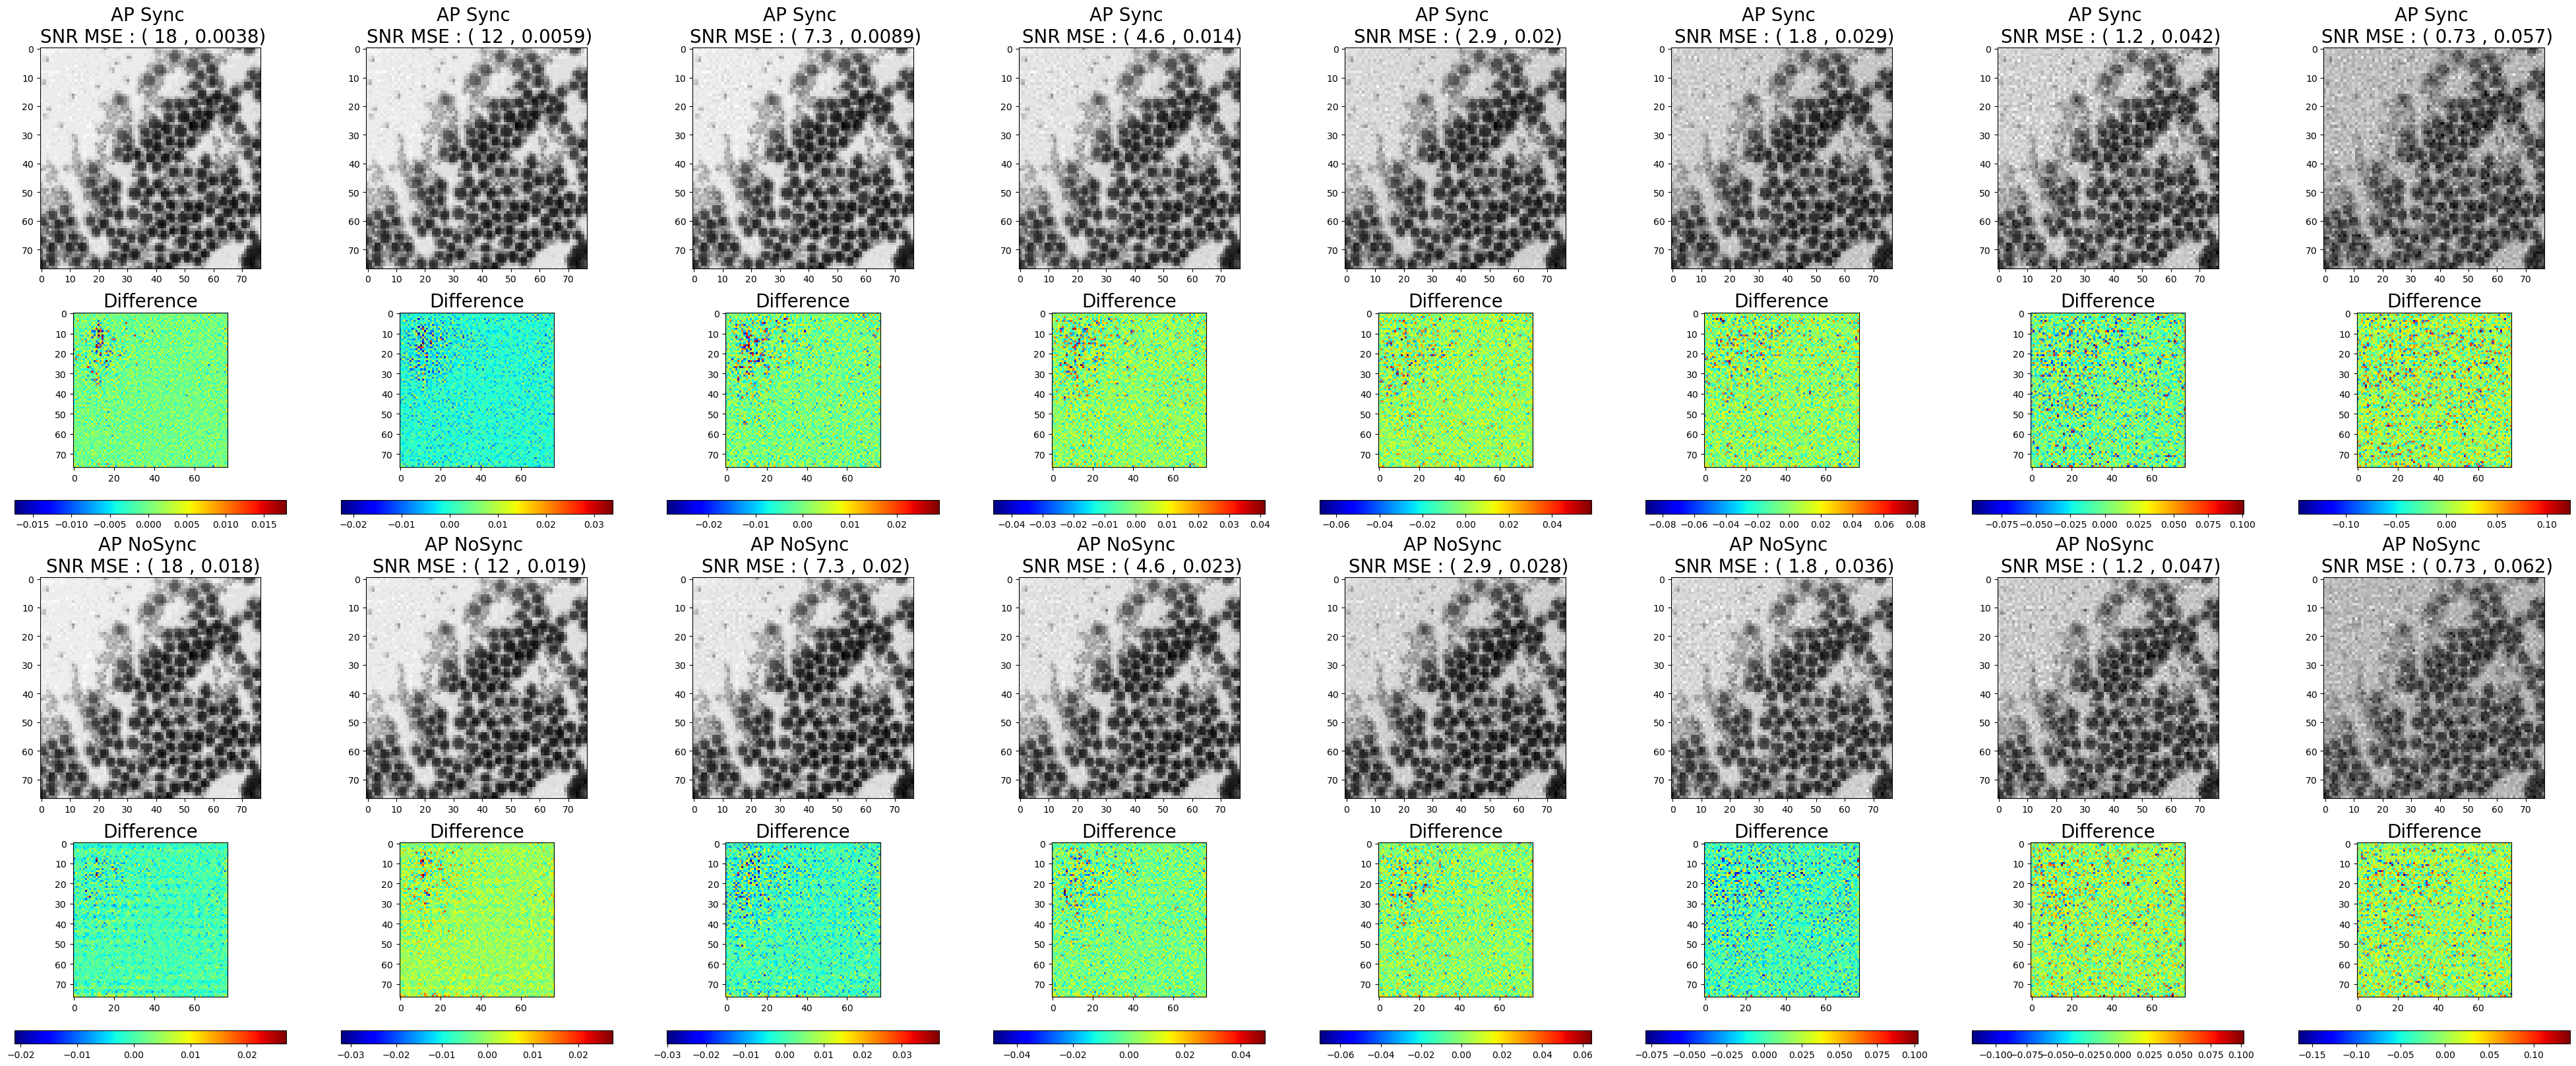

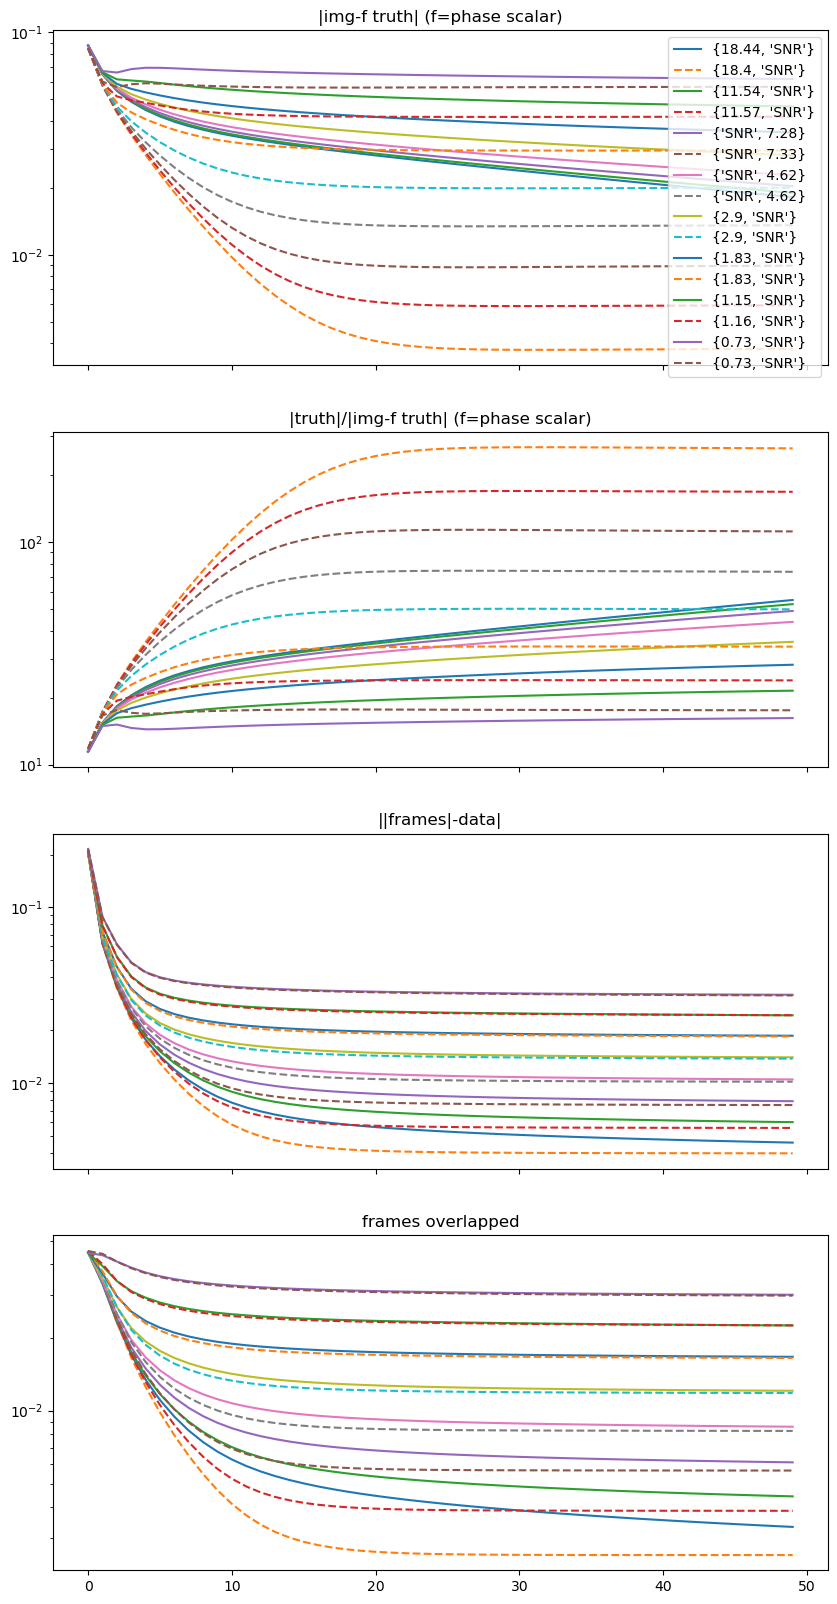

In [12]:
plotter(test_result_nosync, test_result_sync,img_nosync, img_sync, processor)

In [23]:
nmse0, nmse1, truth_low = MSE_aperture(test_result_nosync, test_result_sync,processor,radius = None)

In [24]:
test_result0 = test_result_nosync

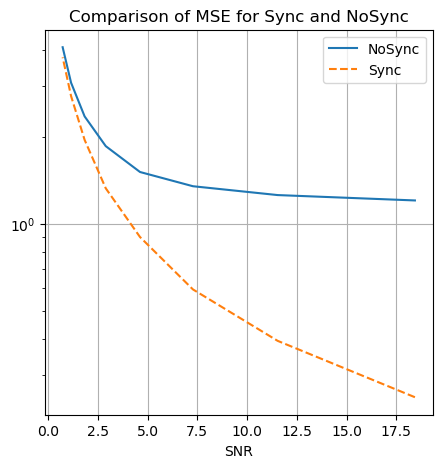

In [25]:
import matplotlib.pyplot as plt
import numpy as xp
fig, axs = plt.subplots(1,1,sharex=True, figsize=(5, 5))
axs.semilogy(xp.asarray(test_result0['SNR']),xp.asarray(nmse0),label = 'NoSync')     
axs.semilogy(xp.asarray(test_result0['SNR']),xp.asarray(nmse1),'--', label = 'Sync')
axs.set_title("Comparison of MSE for Sync and NoSync")
axs.legend(loc = 'upper right')   
axs.set_xlabel('SNR')
axs.grid(True)
plt.show()

Text(0.5, 1.0, ' % Improvement')

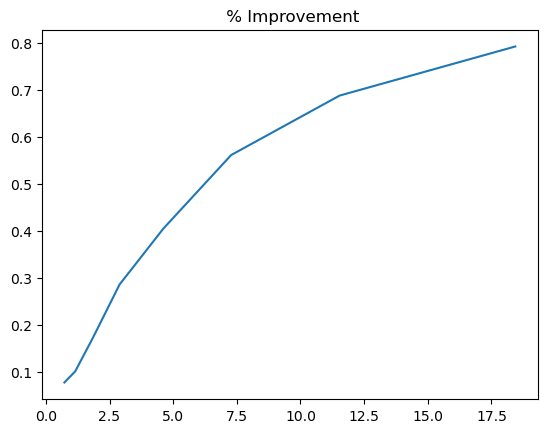

In [30]:
plt.plot(xp.asarray(test_result0['SNR']),abs(xp.asarray(nmse1)-xp.asarray(nmse0))/xp.asarray(nmse0))
plt.title(' % Improvement')

In [33]:
nmse0, nmse1, truth_low = MSE_aperture(test_result_nosync, test_result_sync,processor,radius = 16/5)

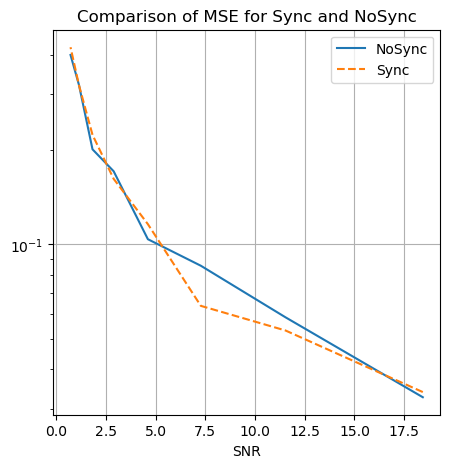

In [34]:
import matplotlib.pyplot as plt
import numpy as xp
fig, axs = plt.subplots(1,1,sharex=True, figsize=(5, 5))
axs.semilogy(xp.asarray(test_result0['SNR']),xp.asarray(nmse0),label = 'NoSync')     
axs.semilogy(xp.asarray(test_result0['SNR']),xp.asarray(nmse1),'--', label = 'Sync')
axs.set_title("Comparison of MSE for Sync and NoSync")
axs.legend(loc = 'upper right')   
axs.set_xlabel('SNR')
axs.grid(True)
plt.show()

Text(0.5, 1.0, ' % Improvement')

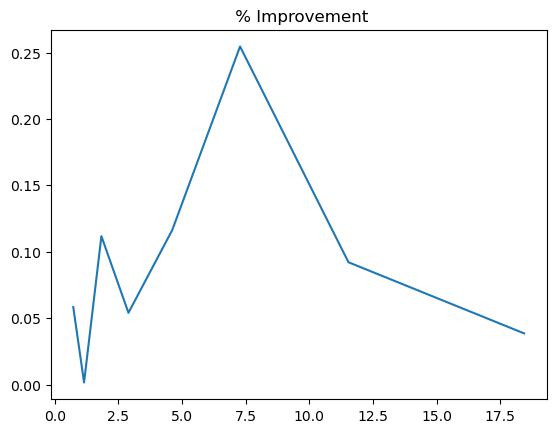

In [35]:
plt.plot(xp.asarray(test_result0['SNR']),abs(xp.asarray(nmse1)-xp.asarray(nmse0))/xp.asarray(nmse0))
plt.title(' % Improvement')

Gaussian Noise

In [14]:
opts = {'refine_illumination' : False,
        'maxiter' : 50, 
        'residuals_interval' : 1,
        'noise_low': -2,
        'noise_high':3,
        'noise_type': 'poisson'
       }

In [15]:
test_result_sync1, img_sync1 = Simulate_Noise(opts,sync = True,processor = processor)

geometry: img size: (77, 77) frames: (16, 16, 256)
not refining illumination, starting with good one, maxiter: 50
total time: 4.689031405025162
total time: 9.186143317027017
total time: 13.667678356054239
total time: 18.201067261048593
total time: 22.705024564056657


In [16]:
test_result_nosync1, img_nosync1 = Simulate_Noise(opts,sync = False,processor = processor)

geometry: img size: (77, 77) frames: (16, 16, 256)
not refining illumination, starting with good one, maxiter: 50
total time: 0.36429234908428043
total time: 0.6820959190372378
total time: 1.0074394310358912
total time: 1.3270454140147194
total time: 1.652701677987352


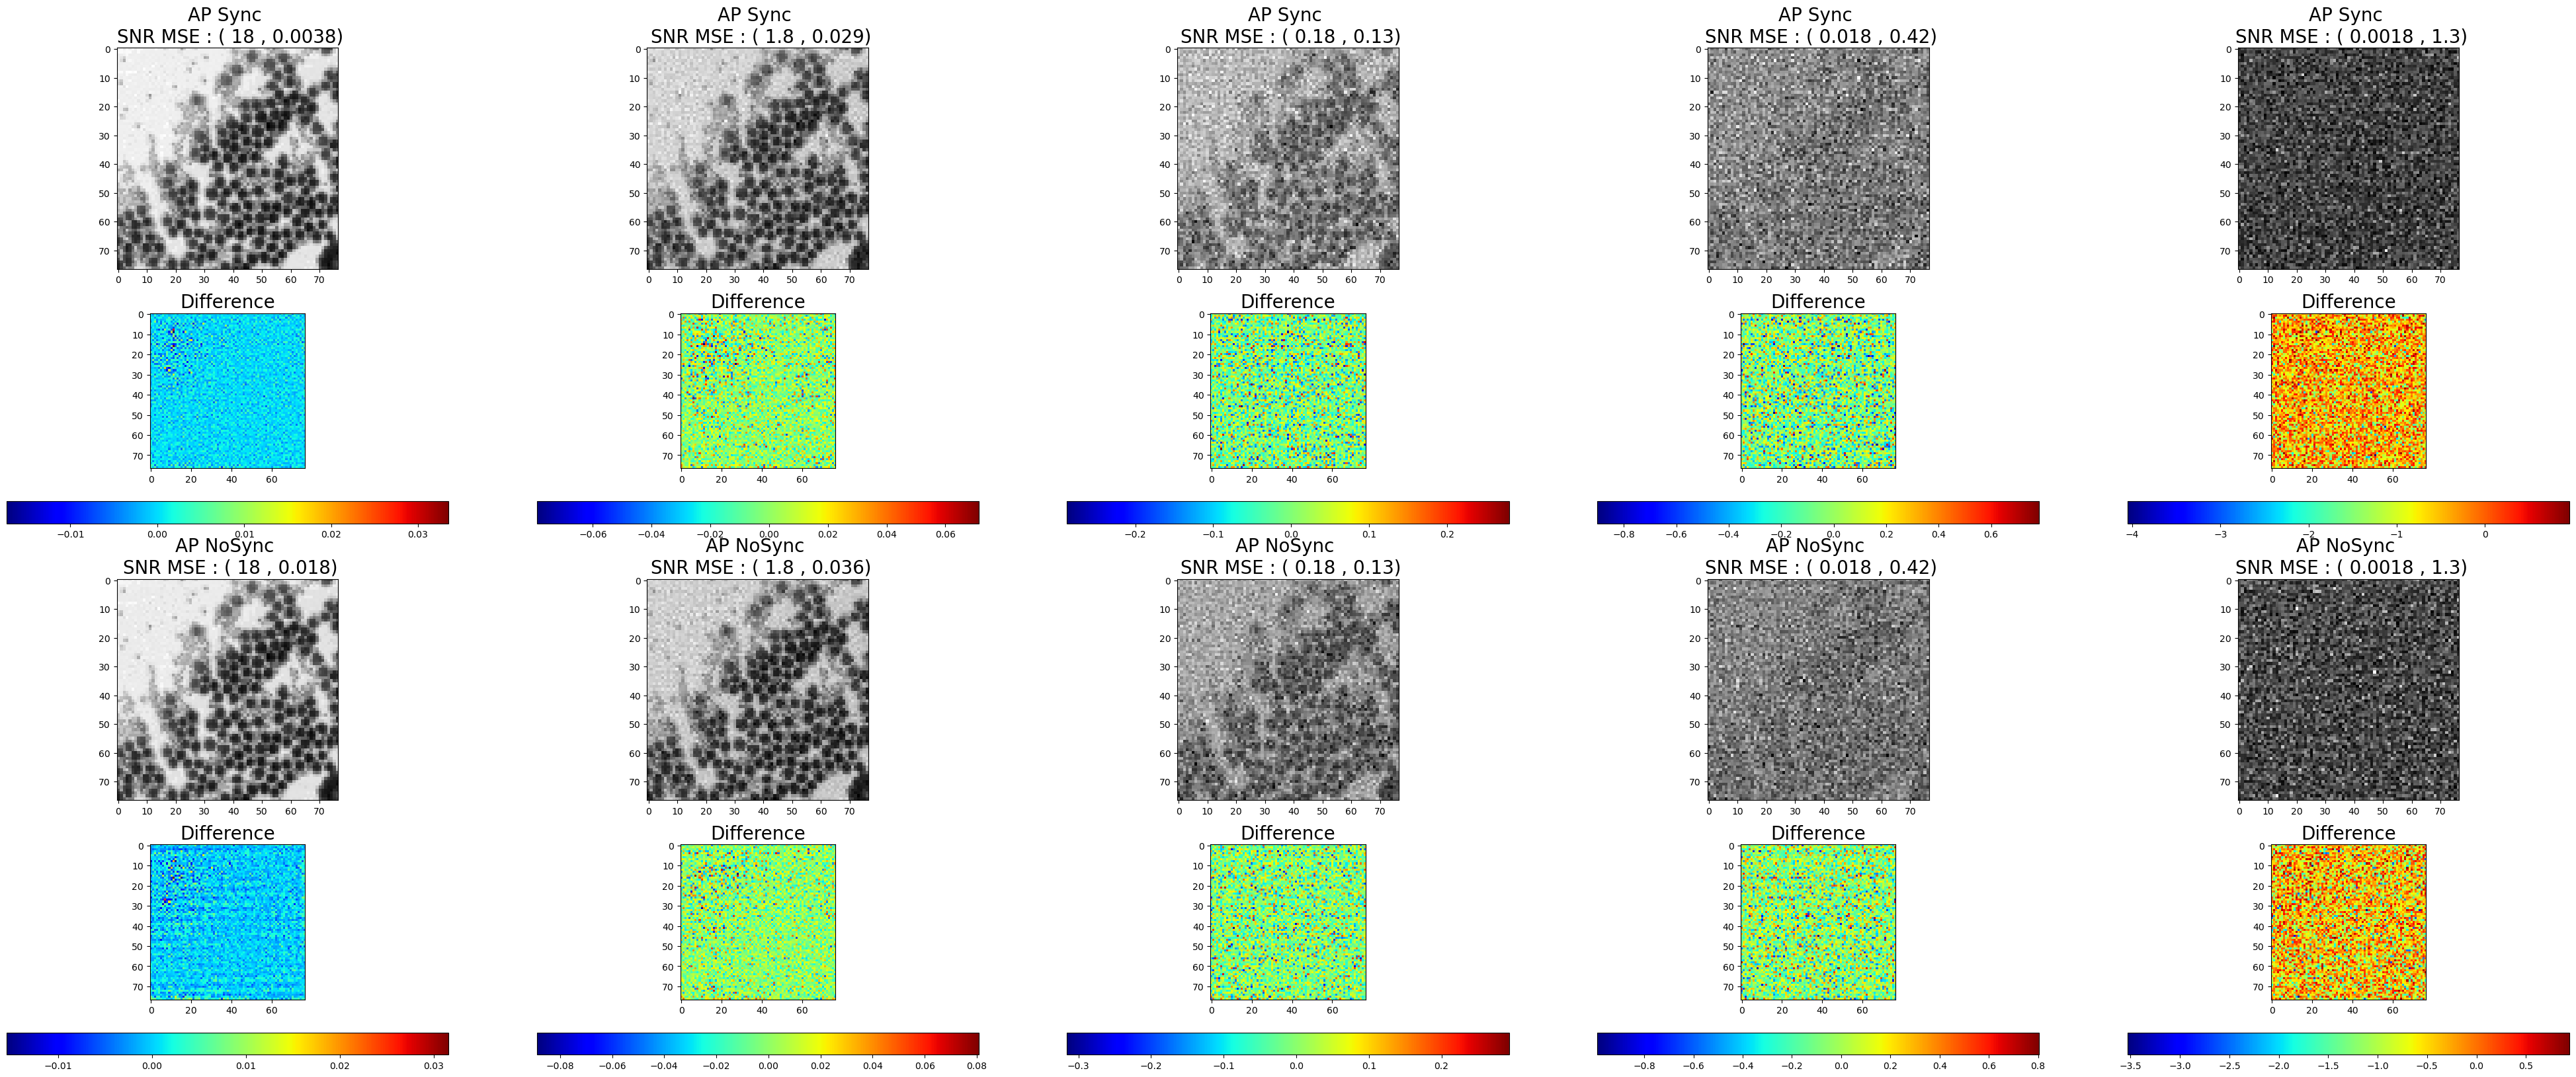

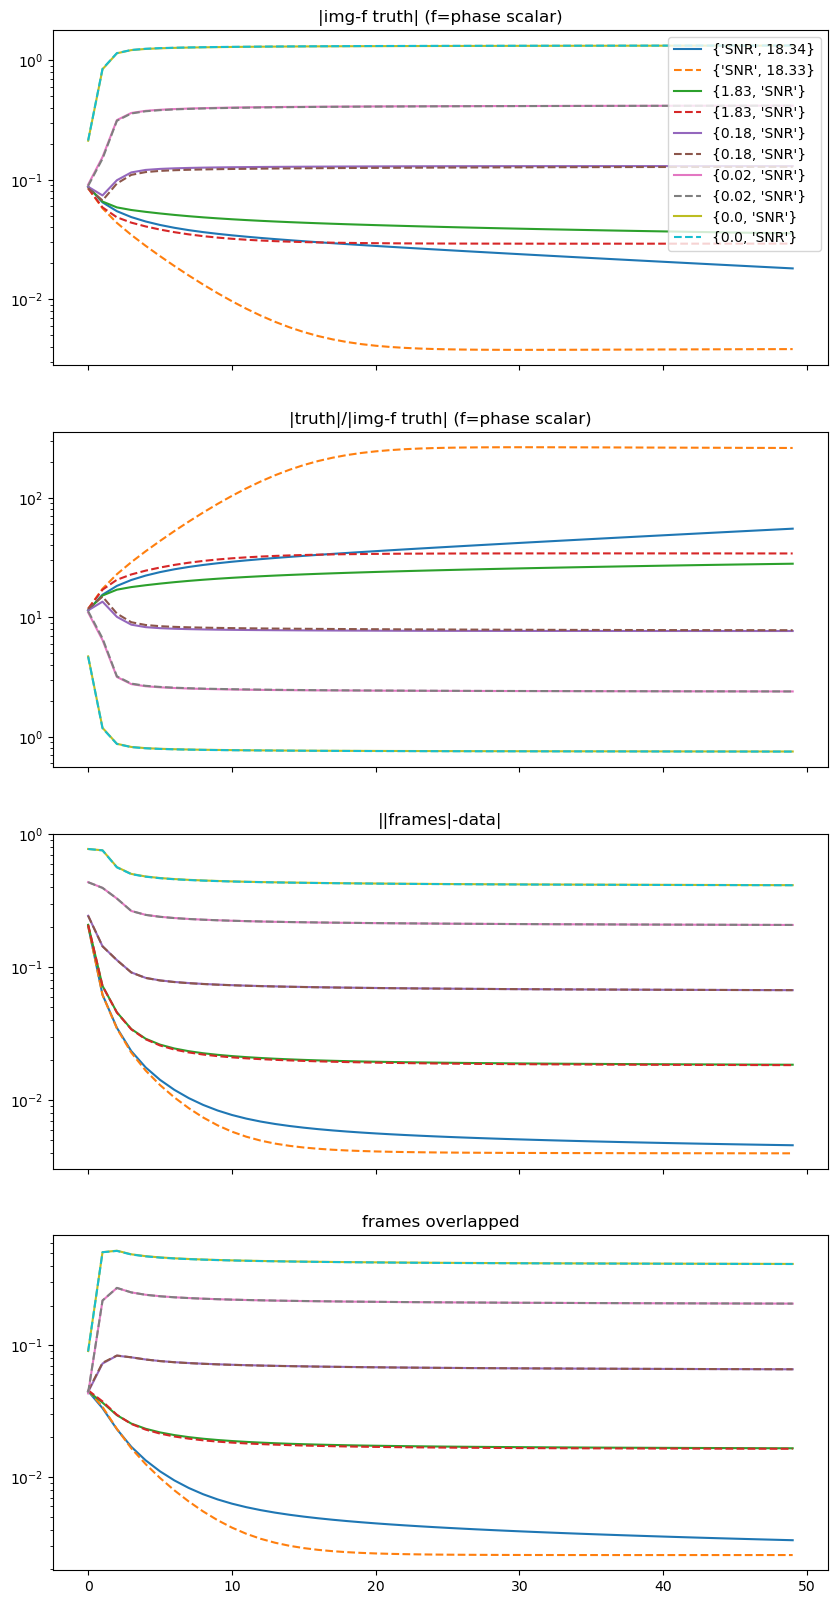

In [17]:
plotter(test_result_nosync1, test_result_sync1,img_nosync1, img_sync1, processor)